# 第3章: 正規表現
Wikipediaの記事を以下のフォーマットで書き出したファイルjawiki-country.json.gzがある．

- 1行に1記事の情報がJSON形式で格納される
- 各行には記事名が”title”キーに，記事本文が”text”キーの辞書オブジェクトに格納され，そのオブジェクトがJSON形式で書き出される
- ファイル全体はgzipで圧縮される

以下の処理を行うプログラムを作成せよ．

## 20. JSONデータの読み込み
Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [1]:
!wget -nc https://nlp100.github.io/data/jawiki-country.json.gz -P data/

--2021-05-31 12:30:13--  https://nlp100.github.io/data/jawiki-country.json.gz
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
nlp100.github.io (nlp100.github.io)|185.199.109.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 5068362 (4.8M) [application/gzip]
`data/jawiki-country.json.gz' に保存中

jawiki-country.json 100%[===================>]   4.83M  8.46MB/s 時間 0.6s       

2021-05-31 12:30:14 (8.46 MB/s) - `data/jawiki-country.json.gz' へ保存完了 [5068362/5068362]



In [2]:
!gunzip data/jawiki-country.json.gz

In [5]:
!head -c 1000 data/jawiki-country.json

{"title": "エジプト", "text": "{{otheruses|主に現代のエジプト・アラブ共和国|古代|古代エジプト}}\n{{基礎情報 国\n|略名 =エジプト\n|漢字書き=埃及\n|日本語国名 =エジプト・アラブ共和国\n|公式国名 ={{lang|ar|'''جمهورية مصر العربية'''}}\n|国旗画像 =Flag of Egypt.svg\n|国章画像 =[[ファイル:Coat_of_arms_of_Egypt.svg|100px|エジプトの国章]]\n|国章リンク =（[[エジプトの国章|国章]]）\n|標語 =なし\n|位置画像 =Egypt (orthographic projection).svg\n|公用語 =[[アラビア語]]\n|首都 =[[File:Flag of Cairo.svg|24px]] [[カイロ]]\n|最大都市 =カイロ\n|元首等肩書 =[[近代エジプトの国家元首の一覧|大統領]]\n|元首等氏名 =[[アブドルファッターフ・アッ＝シーシー]]\n|首相等肩書 ={{ill2|エジプトの首相|en|Prime Minister of Egypt|label=首相}}\n|首相等氏名 ={{仮リンク|ムスタファ・マドブーリー|ar|مصط

In [2]:
import json

# jsonファイルのkeyの確認
with open('data/jawiki-country.json') as fi:
    data = json.loads(fi.readline())
    print(data.keys())

dict_keys(['title', 'text'])


In [8]:
with open('work/jawiki-uk.txt', 'w') as w_fi, open('data/jawiki-country.json') as fi:
    for line in fi:
        data = json.loads(line)
        if data['title'] == 'イギリス':
            print(data['text'], file=w_fi)

## 21. カテゴリ名を含む行を抽出
記事中でカテゴリ名を宣言している行を抽出せよ．

In [9]:
!grep -E '\[\[Category:' work/jawiki-uk.txt

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


※イギリスの記事には[[カテゴリ:名前]]が使われていなかった

In [10]:
!grep -E '\[\[カテゴリ:' work/jawiki-uk.txt

In [11]:
# 文字列メソッドを使用
category_lines = []

with open('work/jawiki-uk.txt') as fi:
    for line in fi:
        line = line.strip()
        if line.startswith('[[Category:') or line.startswith('[[カテゴリ:'):
            category_lines.append(line)
            
category_lines

['[[Category:イギリス|*]]',
 '[[Category:イギリス連邦加盟国]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国|元]]',
 '[[Category:海洋国家]]',
 '[[Category:現存する君主国]]',
 '[[Category:島国]]',
 '[[Category:1801年に成立した国家・領域]]']

In [3]:
# 正規表現を使用
import re
category_lines = []

with open('work/jawiki-uk.txt') as fi:
    for line in fi:
        line = line.strip()
        if re.match(r'\[\[(Category:|カテゴリ:)', line):
            category_lines.append(line)

category_lines

['[[Category:イギリス|*]]',
 '[[Category:イギリス連邦加盟国]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国|元]]',
 '[[Category:海洋国家]]',
 '[[Category:現存する君主国]]',
 '[[Category:島国]]',
 '[[Category:1801年に成立した国家・領域]]']

## 22. カテゴリ名の抽出
記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [13]:
# 文字列メソッドを使用
categories = []
with open('work/jawiki-uk.txt') as fi:
    for line in fi:
        line = line.strip()
        
        if line.startswith('[[Category:'):
            offset = 11
        elif line.startswith('[[カテゴリ:'):
            offset = 7
        else:
            continue
    
        line = line[offset:]
    
        if '|' in line:
            category, *_ = line.split('|')
        else:
            category = line.rstrip(']')
        categories.append(category)

categories

['イギリス',
 'イギリス連邦加盟国',
 '英連邦王国',
 'G8加盟国',
 '欧州連合加盟国',
 '海洋国家',
 '現存する君主国',
 '島国',
 '1801年に成立した国家・領域']

In [14]:
# 正規表現を使用
categories = []

with open('work/jawiki-uk.txt') as fi:
    for line in fi:
        line = line.strip()
        result = re.match(r'\[\[(Category:|カテゴリ:)([^\]|]+)', line)
        if result:
            categories.append(result.group(2))
categories

['イギリス',
 'イギリス連邦加盟国',
 '英連邦王国',
 'G8加盟国',
 '欧州連合加盟国',
 '海洋国家',
 '現存する君主国',
 '島国',
 '1801年に成立した国家・領域']

- 正規表現の解説
    - [[(Category:|カテゴリ:)　は文字列の先頭が"[[Category:"または"[[カテゴリ"になっているものにマッチ
    - ([^]|]+)は，(]と|)以外の1文字以上の文字列集合にマッチ

## 23. セクション構造
記事中に含まれるセクション名とそのレベル（例えば”== セクション名 ==”なら1）を表示せよ．

In [15]:
# 文字列メソッドを使用
with open('work/jawiki-uk.txt') as fi:
    for line in fi:
        if line.startswith('=='):
            line = line.strip()
            sec_level = line.count('=') // 2  # レベルは，'='の数 / 2で求められる
            sec_name = line[sec_level:-sec_level].strip()
            print(sec_name, sec_level-1, sep='\t')

国名	1
歴史	1
地理	1
主要都市	2
気候	2
政治	1
元首	2
法	2
内政	2
地方行政区分	2
外交・軍事	2
経済	1
鉱業	2
農業	2
貿易	2
不動産	2
エネルギー政策	2
通貨	2
企業	2
通信	3
交通	1
道路	2
鉄道	2
海運	2
航空	2
科学技術	1
国民	1
言語	2
宗教	2
婚姻	2
移住	2
教育	2
医療	2
文化	1
食文化	2
文学	2
哲学	2
音楽	2
ポピュラー音楽	3
映画	2
コメディ	2
国花	2
世界遺産	2
祝祭日	2
スポーツ	2
サッカー	3
クリケット	3
競馬	3
モータースポーツ	3
野球	3
カーリング	3
自転車競技	3
脚注	1
関連項目	1
外部リンク	1


In [16]:
# 正規表現を使用
with open('work/jawiki-uk.txt') as fi:
    for line in fi:
        line = line.strip()
        match = re.match(r'(==+) *(.+) *\1$', line)
        if match:
            print(match.group(2), len(match.group(1)) - 1, sep='\t')

国名	1
歴史	1
地理	1
主要都市	2
気候	2
政治	1
元首	2
法	2
内政	2
地方行政区分	2
外交・軍事	2
経済	1
鉱業	2
農業	2
貿易	2
不動産	2
エネルギー政策	2
通貨	2
企業	2
通信	3
交通	1
道路	2
鉄道	2
海運	2
航空	2
科学技術	1
国民	1
言語	2
宗教	2
婚姻	2
移住	2
教育	2
医療	2
文化	1
食文化	2
文学	2
哲学	2
音楽	2
ポピュラー音楽	3
映画	2
コメディ	2
国花	2
世界遺産	2
祝祭日	2
スポーツ	2
サッカー	3
クリケット	3
競馬	3
モータースポーツ	3
野球	3
カーリング 	3
自転車競技 	3
脚注	1
関連項目	1
外部リンク	1


- 正規表現の解説
    - (==+): 2文字以上の"="を表す
    - ␣*: 0文字以上の半角スペース
    - (.+): 1文字以上の任意の文字列（貪欲マッチ）
    - \1: 手前でマッチしたもの（==+）にそのままマッチ
    - $: 文字列の末尾

## 24. ファイル参照の抽出
記事から参照されているメディアファイルをすべて抜き出せ．

In [17]:
# パターンが複雑なため正規表現でやる
media_files = []

with open('work/jawiki-uk.txt') as fi:
    for line in fi:
        line = line.strip()
        for match in re.finditer(r'\[\[(:?File:|Media:|ファイル:)([^\]|]+)', line):
            media_files.append(match.group(2))
            
media_files

['Royal Coat of Arms of the United Kingdom.svg',
 'United States Navy Band - God Save the Queen.ogg',
 'Descriptio Prime Tabulae Europae.jpg',
 "Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg",
 'London.bankofengland.arp.jpg',
 'Battle of Waterloo 1815.PNG',
 'Uk topo en.jpg',
 'BenNevis2005.jpg',
 'Population density UK 2011 census.png',
 '2019 Greenwich Peninsula & Canary Wharf.jpg',
 'Birmingham Skyline from Edgbaston Cricket Ground crop.jpg',
 'Leeds CBD at night.jpg',
 'Glasgow and the Clyde from the air (geograph 4665720).jpg',
 'Palace of Westminster, London - Feb 2007.jpg',
 'Scotland Parliament Holyrood.jpg',
 'Donald Trump and Theresa May (33998675310) (cropped).jpg',
 'Soldiers Trooping the Colour, 16th June 2007.jpg',
 'City of London skyline from London City Hall - Oct 2008.jpg',
 'Oil platform in the North SeaPros.jpg',
 'Eurostar at St Pancras Jan 2008.jpg',
 'Heathrow Terminal 5C Iwelumo-1.jpg',
 'Airbus A380-841 G-XLEB British Airways (10424102995).jpg',
 'UKpop.svg',
 

## 25. テンプレートの抽出
記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．

In [10]:
from itertools import islice

with open('work/jawiki-uk.txt') as fi:
    contents = fi.read()

info = {}
pattern = r'{{基礎情報 国\n\|(.*?)\n}}'  
prog = re.compile(pattern,re.DOTALL)  # DOTALLで改行を含む文字列を扱う
template = prog.search(contents)  # 基礎情報templateの抽出

for data in template.groups()[0].split('\n|'):  # 項目ごとに分解してforループ
    data = data.strip().split(' =')  # フィールド名と値に分解
    info[data[0].strip()] = data[1].strip()  # 辞書に追加

for k, v in islice(info.items(), 10):
    print(k, v)

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
国旗画像 Flag of the United Kingdom.svg
国章画像 [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク （[[イギリスの国章|国章]]）
標語 {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌 [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[フ

## 26. 強調マークアップの除去
25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: マークアップ早見表）．

In [12]:
# info:基礎情報の辞書 dic_q26:強調マークアップ除去済みのinfo
dic_q26 = {}

for key,value in info.items():
    # 斜体と強調を除去　'''''斜体と強調'''''→他との強調
    dic_q26[key] = re.sub("'''''","",value)
    # 強調を除去　'''強調'''→強調
    dic_q26[key] = re.sub("'''","",dic_q26[key])
    # 他との区別を除去　''他との区別''→他との区別
    dic_q26[key] = re.sub("''","",dic_q26[key])
    
for k, v in islice(dic_q26.items(), 20):
    print(k, v)

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
国旗画像 Flag of the United Kingdom.svg
国章画像 [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク （[[イギリスの国章|国章]]）
標語 {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌 [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:

## 27. 内部リンクの除去
26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

In [13]:
# マッチオブジェクトを引数として、マッチした文字列のうち記事名or表示文字を取り出す関数
def internal_link_remove(match_object):
    match_text = match_object.group('text')  # match_text:マッチした文字列の名前をつけた部分
    # ファイルへのリンクはそのまま
    if match_text.startswith('ファイル:'):
        return match_object.group(0)  # 置換せずそのままにするのでマッチした文字列全体を返す
    else:
        text = re.sub(r'.*?\|', '', match_text)  # |で分割し一番後ろを取ってくることで実現
        return text

dic_q27 = {}  # 内部リンクまで除去済みのinfo

for key, value in dic_q26.items():
    # re.sub()の引数replは関数を渡すことが可能
    # 関数を渡した場合、関数の第一引数にはマッチオブジェクトを取り、置換後の文字列を返す
    # [[記事名]]→記事名　[[記事名|表示文字]]→表示文字　[[記事名#節名｜表示文字]]→表示文字
    # [[ファイル:~]]はそのまま
    dic_q27[key] = re.sub(r"\[\[(?P<text>.*?)]]", internal_link_remove, value)


for k, v in islice(dic_q27.items(), 20):
    print(k, v)

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（スコットランド・ゲール語）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（ウェールズ語）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（アイルランド語）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（コーンウォール語）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（スコットランド語）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
国旗画像 Flag of the United Kingdom.svg
国章画像 [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク （国章）
標語 {{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）
国歌 God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
地図画像 Europe-UK.svg
位置画像 United

## 28. MediaWikiマークアップの除去
27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

In [15]:
# マッチオブジェクトを引数とし、template{{~}}を処理後の文字列を返す関数
def template_remove(match_object):
    text_list = match_object.group('template').split('|')  # |で分割
    # {{~}}の~に|が１つもなかったらその部分まるごと除去
    if len(text_list) == 1:
        return ''
    # {{~|~}}のように、|が１つ以上あったら|の一番右側だけ残す {{A|B|C}}みたいなやつ→Cにする
    else:
        return text_list[-1]
    
dic_q28 = {}  # MediaWikiマークアップまで除去済みのinfo

for k,v in dic_q27.items():
    # 途中で改行があるかもしれないのでDOTALLフラグ指定(これがないと.は改行にマッチしない)
    # {{~}}の除去　
    dic_q28[k] = re.sub(r'\{\{(?P<template>.*?)}}', template_remove, v, flags=re.DOTALL)
    
    #　<ref>~</ref>,<ref name=~/>の除去
    dic_q28[k] = re.sub(r'<ref>.*?</ref>|<ref.*?/(ref)*>', '', dic_q28[k], flags=re.DOTALL)
    
    #　{{~}}<br/>,~<br />{{~}}の除去
    dic_q28[k] = re.sub(r'(\{\{)*(?P<name>.*?)(\}\})*(<br(\s)*/>)*', '\g<name>', dic_q28[k], flags=re.DOTALL)
    
    # ファイルの[[ファイル:~]]を除去　[[ファイル:~]]→ファイル:~
    dic_q28[k] = re.sub(r'\[\[(?P<file_info>.*?)]]', '\g<file_info>', dic_q28[k], flags=re.DOTALL)

    
for k, v in islice(dic_q28.items(), 20):
    print(k, v)

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 United Kingdom of Great Britain and Northern Ireland
国旗画像 Flag of the United Kingdom.svg
国章画像 ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章
国章リンク （国章）
標語 Dieu et mon droit（フランス語:神と我が権利）
国歌 God Save the Queen神よ女王を護り賜えファイル:United States Navy Band - God Save the Queen.ogg
地図画像 Europe-UK.svg
位置画像 United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 英語
首都 ロンドン（事実上）
最大都市 ロンドン
元首等肩書 女王
元首等氏名 エリザベス2世
首相等肩書 首相
首相等氏名 ボリス・ジョンソン
他元首等肩書1 貴族院議長
他元首等氏名1 ノーマン・ファウラー
他元首等肩書2 庶民院議長


## 29. 国旗画像のURLを取得する
テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: MediaWiki APIのimageinfoを呼び出して，ファイル参照をURLに変換すればよい）

In [17]:
import requests

session = requests.Session()  # sessionを有効にする

URL = 'https://www.mediawiki.org/w/api.php'

info = dic_q28['国旗画像']  # 国旗画像のURL

# action:操作(queryとかloginとか)
# format:出力フォーマット
# prop:取得したい情報は？(info,images,links,など)
# titles:記事タイトル
# iiprop:取得する要素　今回はURL
PARAMS = {
    "action":"query",
    "format":"json",
    "prop":"imageinfo",
    "iiprop":"url",
    "titles":"File:"+info    
}


response  = session.get(url=URL,params=PARAMS)
print(response)
data = response.json()  # レスポンスをデコード
print(data)  # jsonデータの確認用
url = data["query"]["pages"]["-1"]["imageinfo"][0]["url"]
print(url)

<Response [200]>
{'continue': {'iistart': '2019-09-10T16:52:58Z', 'continue': '||'}, 'query': {'pages': {'-1': {'ns': 6, 'title': 'File:Flag of the United Kingdom.svg', 'missing': '', 'known': '', 'imagerepository': 'shared', 'imageinfo': [{'url': 'https://upload.wikimedia.org/wikipedia/commons/a/ae/Flag_of_the_United_Kingdom.svg', 'descriptionurl': 'https://commons.wikimedia.org/wiki/File:Flag_of_the_United_Kingdom.svg', 'descriptionshorturl': 'https://commons.wikimedia.org/w/index.php?curid=347935'}]}}}}
https://upload.wikimedia.org/wikipedia/commons/a/ae/Flag_of_the_United_Kingdom.svg


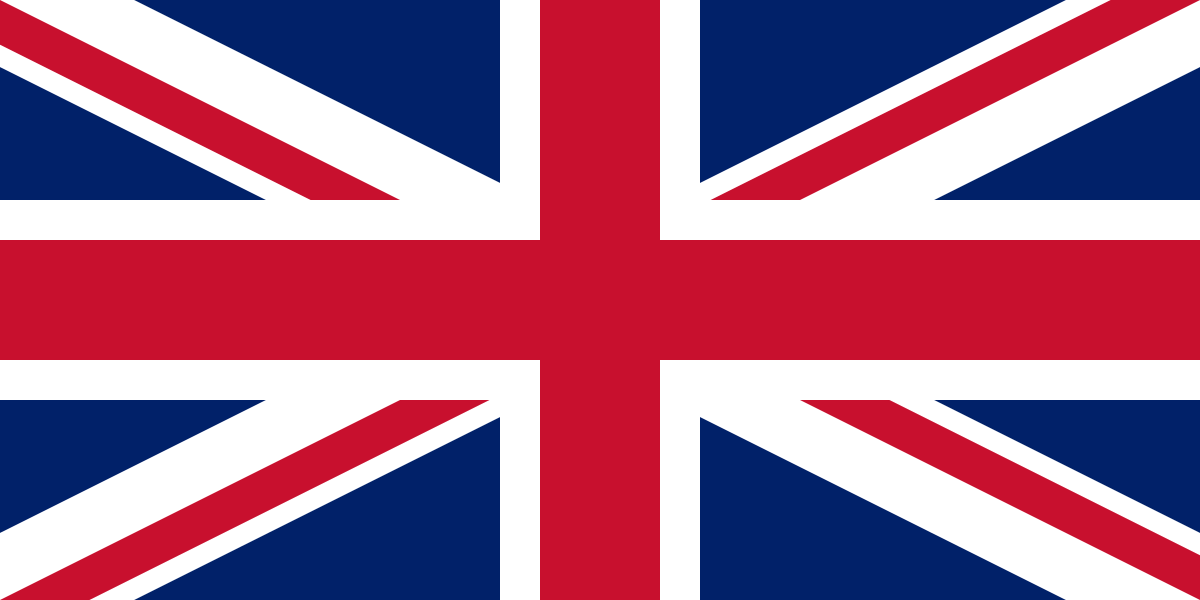

In [18]:
# 国旗画像表示
from IPython.display import Image,SVG
SVG(url)